In [1]:
import os
import sys
project_dir = os.getcwd().split('notebooks')[0]
sys.path.append(project_dir)

In [2]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from src.utils.extract_data import *
from src.utils.metrics_plot import *
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix
from statistics import mean

# RAPPEL MÉTRIQUES
--> elles se décomposent en **micro**, **macro** et **weighted** en général
- micro en général pour la généralisation de la classification binaire à la multi-labels
- macro comme une moyenne de la métrique sur chacun des labels (les labels sont donc supposés équitablement répartis dans l'échantillon) 
- weighted: on fait une moyenne pondérée de la métrique où balance par le poids ie la fréquence d'apparition du label.

\
Ici on choisira **micro**

 On rappelle également que: 
## Precision 
$$precision = \frac{TP}{TP+FP}$$ 
## Recall 
$$recall= \frac{TP}{TP+FN} $$
## F1-score
 $$f1-score= \frac{precision * recall}{precision + recall} $$
## Hamming Loss
 hamming loss = la proportion de labels incorrets 
 
 
 



# Préparation des données

In [3]:
df=pd.read_csv(os.path.join(project_dir,'dataset.csv'))
X,Y=extract_values_array(df,p=1,audio=True,usage=False)
l=list(df.columns[0:22])
l.remove('song_index')

## Mise en forme des résultats 


In [4]:
metrics=['Accuracy','Precision micro', 'Recall micro', 'F1 score micro', 'Hamming-Loss']
final_res=pd.DataFrame(columns=metrics)

<AxesSubplot:>

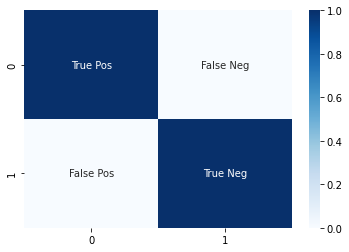

In [5]:
labels = ["True Pos","False Neg","False Pos","True Neg"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(np.eye(2), annot=labels, fmt="", cmap='Blues')

# Méthode 1: Naive - TOP GENRE 
Attribuer le genre le plus représenté: le rock




In [6]:
df_naif=pd.DataFrame(columns=l)
n=df.shape[0]
for label in l: 
  if label!='rock':
    df_naif[label]=np.zeros(n, dtype=int)
  else :
    df_naif[label]=np.zeros(n, dtype=int)+1
df_naif

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,...,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50557,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50558,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50559,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50560,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_pred = df_naif.values
y_true = df[l].values

In [8]:
r=all_metrics(y_true,y_pred)

In [9]:
final_res.loc['Top Genre']=r

In [10]:
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
Top Genre,0.108,0.162,0.138,0.149,0.088


# Méthode 2: L régressions logistiques unilabel


## Audio feature only - whitout penalization

##### ROC


In [11]:
df_hat=pd.DataFrame()
df_test=pd.DataFrame()
n=len(l)
i=0
auc_labels=[]
for label in l:
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y[:,i],test_size=0.3, random_state=5)
    logreg = LogisticRegression(max_iter=10000)
    filename= os.path.join(project_dir,'docs/LR/joblib_LR_audio_only/'+label)
    logreg = load_fit(logreg,X_train,Y_train,filename)
    y_hat = logreg.predict(X_test)
    y_hat_2=logreg.predict_proba(X_test)[:,1]
    df_hat[label] = y_hat
    df_test[label]=Y_test
    title='ROC curve ' + label + ' unilabel Logistic Regression'
    name_fig=os.path.join(project_dir,'docs/LR/ROC_LR_audio_only/'+label)
    AUC= plot_roc_curve(Y_test, y_hat_2, title=title, name_fig=name_fig,save=True)
    auc_labels.append(AUC)
    i+=1


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use

<Figure size 432x288 with 0 Axes>

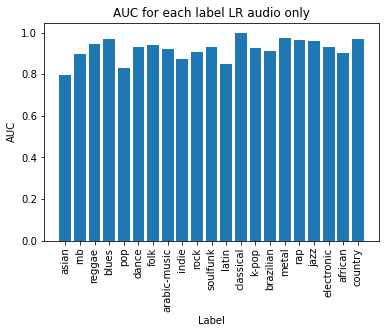

In [12]:
name_fig=os.path.join(project_dir,'docs/LR/ROC_LR_audio_only/auc')
graph_auc(auc_labels,'LR audio only',save=True,name_fig=name_fig)

##### Matrices de confusion 

In [13]:
y_true=df_test.values
y_pred=df_hat.values

In [14]:
conf=multilabel_confusion_matrix(y_true,y_pred)
i=0
for cm in conf:
    label=l[i]
    name_fig= os.path.join(project_dir,'docs/LR/CM_LR_audio_only/'+label)
    plot_confusion_matrix(cm,title=label,classes=[label,'Others'],normalize=True,save=True,name_fig=name_fig)
    i=i+1

<Figure size 432x288 with 0 Axes>

##### Résultats

In [15]:
r=all_metrics(y_true,y_pred)
final_res.loc['RL audio (seulement) & sans pénalisation']=r
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
Top Genre,0.108,0.162,0.138,0.149,0.088
RL audio (seulement) & sans pénalisation,0.360,0.725,0.432,0.541,0.041


## Audio features only - penalization (Lasso)

Ici il s'agira d'appliquer un critère de pénalisation à la méthode Régression Logistique dans le but de sélectionner des variables, nous choisissons de faire le tuning de l'hyperparamètre pour chaque RL (chaque label). 
Nous comparons 2 résultats: 
- audio features uniquement 
- les deux 

L'argorithme utilisé pour faire l'optimisation de l'hyperparamètre C de la fonction LogisticRegression est  `GridSearchCV(estimator,parameters,cv)`: algorithme récursif qui va comparer en stratifiant l'échantillon train en `cv` parties, l'accuracy `cv`fois. 
La fonction `LogisticRegression` va prendre le paramètre `penalty=l1 `pour faire une sélection Lasso ie sélectionner des variables, l'algorithme de résolution est `saga` c'est une descente de gradient, plus rapide pour leslarges sets de données comme cecui ci, néanmoins très couteux en mémoire et en temps tout de même, nous choisissons le solver `liblinear`moins précis


##### ROC

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
df_hat=pd.DataFrame()
df_test=pd.DataFrame()
i=0
nb_feature_selected=[]
auc_labels=[]
for label in l:
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y[:,i],test_size=0.3, random_state=5)
    logreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
    parameters={'C':[1e-5,1e-4,1e-3,1e-2,1e-1,1]}
    gs=GridSearchCV(logreg,parameters,cv=3,verbose=3)
    filename=os.path.join(project_dir,'docs/LR/joblib_LR_audio_only_penal/'+label)
    logreg = load_fit(gs,X_train,Y_train,filename) 
    temp=logreg.best_estimator_.coef_
    n_label=(temp>0).sum()
    nb_feature_selected.append(n_label)
    y_hat= logreg.predict(X_test)
    y_hat_2=logreg.predict_proba(X_test)[:,1]
    df_hat[label] = y_hat
    df_test[label]=Y_test
    name_fig= os.path.join(project_dir,'docs/LR/ROC_LR_audio_only_penal/'+label)
    AUC= plot_roc_curve(Y_test, y_hat_2, title=label, name_fig=name_fig,save=True)
    auc_labels.append(AUC)
    i+=1


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at yo

<Figure size 432x288 with 0 Axes>

In [18]:
selected_features_audio=pd.DataFrame(columns=['Label','% of Features Selected'])
selected_features_audio['Label']=l 
for  i in range (21):
    nb_feature_selected[i]=round((nb_feature_selected[i]/256)*100,2)
selected_features_audio['% of Features Selected']=nb_feature_selected
selected_features_audio.to_csv(os.path.join(project_dir,'docs/LR/selected_audio.csv'), index=False)

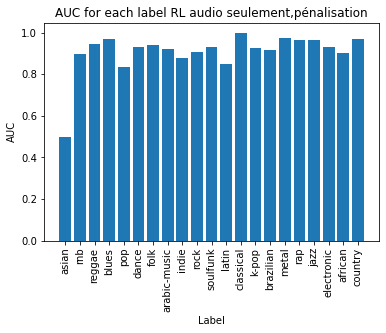

In [19]:
name=os.path.join(project_dir,'docs/LR/ROC_LR_audio_only_penal/AUC')
graph_auc(auc_labels,'RL audio seulement,pénalisation',save=True,name_fig=name)

##### Matrices de confusion

In [20]:
y_true=df_test.values
y_pred=df_hat.values
conf=multilabel_confusion_matrix(y_true,y_pred)
i=0
for cm in conf:
    label=l[i]
    name_fig= os.path.join(project_dir,'docs/LR/CM_LR_audio_only_penal/'+label)
    plot_confusion_matrix(cm,title=label,classes=[label,'Others'],normalize=True,save=True,name_fig=name_fig)
    i=i+1

<Figure size 432x288 with 0 Axes>

##### Résultats

In [21]:
r=all_metrics(y_true,y_pred)
final_res.loc['RL audio (seulement)& pénalisation (optimisée)']=r

## Usage features only - whitout penalization

In [22]:
X,Y=extract_values_array(df,p=1,audio=False,usage=True)

##### ROC

In [23]:
df_hat=pd.DataFrame()
df_test=pd.DataFrame()
n=len(l)
i=0
auc_labels=[]
for label in l:
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y[:,i],test_size=0.3, random_state=5)
    logreg = LogisticRegression(max_iter=10000)
    filename= os.path.join(project_dir,'docs/LR/joblib_LR_usage_only/'+label)
    logreg = load_fit(logreg,X_train,Y_train,filename)
    y_hat = logreg.predict(X_test)
    y_hat_2=logreg.predict_proba(X_test)[:,1]
    df_hat[label] = y_hat
    df_test[label]=Y_test
    title='ROC curve ' + label + ' unilabel Logistic Regression'
    name_fig=os.path.join(project_dir,'docs/LR/ROC_LR_usage_only/'+label)
    AUC= plot_roc_curve(Y_test, y_hat_2, title=title, name_fig=name_fig,save=True)
    auc_labels.append(AUC)
    i+=1


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use

<Figure size 432x288 with 0 Axes>

##### Matrices de confusion

In [24]:
y_true=df_test.values
y_pred=df_hat.values
conf=multilabel_confusion_matrix(y_true,y_pred)
i=0
for cm in conf:
    label=l[i]
    name_fig= os.path.join(project_dir,'docs/LR/CM_LR_usage_only/'+label)
    plot_confusion_matrix(cm,title=label,classes=[label,'Others'],normalize=True,save=True,name_fig=name_fig)
    i=i+1

<Figure size 432x288 with 0 Axes>

##### Résultats

In [25]:
r=all_metrics(y_true,y_pred)
final_res.loc['RL usage (seulement) & sans pénalisation']=r
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
Top Genre,0.108,0.162,0.138,0.149,0.088
RL audio (seulement) & sans pénalisation,0.360,0.725,0.432,0.541,0.041
RL audio (seulement)& pénalisation (optimisée),0.354,0.738,0.421,0.536,0.041
RL usage (seulement) & sans pénalisation,0.715,0.871,0.788,0.827,0.018


## Usage features only - with penalization:

##### ROC

In [26]:
df_hat=pd.DataFrame()
df_test=pd.DataFrame()
i=0
nb_feature_selected=[]
auc_labels=[]
for label in l:
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y[:,i],test_size=0.3, random_state=5)
    logreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
    parameters={'C':[1e-5,1e-4,1e-3,1e-2,1e-1,1]}
    gs=GridSearchCV(logreg,parameters,cv=3,verbose=3)
    filename=os.path.join(project_dir,'docs/LR/joblib_LR_usage_only_penal/'+label)
    logreg = load_fit(gs,X_train,Y_train,filename) 
    temp=logreg.best_estimator_.coef_
    n_label=(temp>0).sum()
    nb_feature_selected.append(n_label)
    y_hat= logreg.predict(X_test)
    y_hat_2=logreg.predict_proba(X_test)[:,1]
    df_hat[label] = y_hat
    df_test[label]=Y_test
    name_fig= os.path.join(project_dir,'docs/LR/ROC_LR_usage_only_penal/'+label)
    AUC= plot_roc_curve(Y_test, y_hat_2, title=label, name_fig=name_fig,save=True)
    auc_labels.append(AUC)
    i+=1


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at yo

<Figure size 432x288 with 0 Axes>

In [27]:
selected_features_usage=pd.DataFrame(columns=['Label','% of Features Selected'])
selected_features_usage['Label']=l
for  i in range (21):
    nb_feature_selected[i]=round((nb_feature_selected[i]/128)*100,2)
selected_features_usage['% of Features Selected']=nb_feature_selected
selected_features_usage.to_csv(os.path.join(project_dir,'docs/LR/selected_usage.csv'), index=False)

##### Matrices de confusion

In [28]:
y_true=df_test.values
y_pred=df_hat.values
conf=multilabel_confusion_matrix(y_true,y_pred)
i=0
for cm in conf:
    label=l[i]
    name_fig= os.path.join(project_dir,'docs/LR/CM_LR_usage_only_penal/'+label)
    plot_confusion_matrix(cm,title=label,classes=[label,'Others'],normalize=True,save=True,name_fig=name_fig)
    i=i+1

<Figure size 432x288 with 0 Axes>

##### Résultats 

In [29]:
r=all_metrics(y_true,y_pred)
final_res.loc['RL usage (seulement) & pénalisation (optimisée)']=r
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
Top Genre,0.108,0.162,0.138,0.149,0.088
RL audio (seulement) & sans pénalisation,0.360,0.725,0.432,0.541,0.041
RL audio (seulement)& pénalisation (optimisée),0.354,0.738,0.421,0.536,0.041
RL usage (seulement) & sans pénalisation,0.715,0.871,0.788,0.827,0.018
RL usage (seulement) & pénalisation (optimisée),0.715,0.871,0.787,0.827,0.018


## Audio & Usage without penalisation


##### ROC

In [30]:
X,Y=extract_values_array(df,p=1,audio=True,usage=True)

In [31]:
df_hat=pd.DataFrame()
df_test=pd.DataFrame()
i=0
n_features=[]
n_audio=[]
n_usage=[]
auc_labels=[]
for label in l:
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y[:,i],test_size=0.3, random_state=5)
    logreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
    filename=os.path.join(project_dir,'docs/LR/joblib_LR_audio_usage/'+label)
    lg = load_fit(logreg,X_train,Y_train,filename) 
    y_hat= lg.predict(X_test)
    y_hat_2=lg.predict_proba(X_test)[:,1]
    df_hat[label] = y_hat
    df_test[label]=Y_test
    name_fig= os.path.join(project_dir,'docs/LR/ROC_LR_audio_usage/'+label)
    AUC= plot_roc_curve(Y_test, y_hat_2, title=label, name_fig=name_fig,save=True)
    auc_labels.append(AUC)
    i+=1


<Figure size 432x288 with 0 Axes>

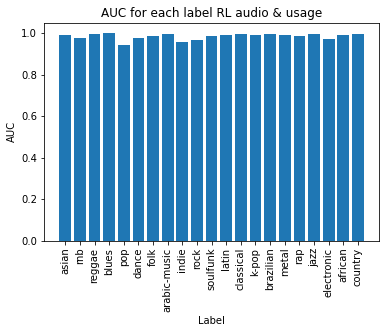

In [32]:
name=os.path.join(project_dir,'docs/LR/ROC_LR_audio_usage/AUC')
graph_auc(auc_labels,'RL audio & usage',save=True,name_fig=name)

##### Matrice de confusion

In [33]:
y_true=df_test.values
y_pred=df_hat.values
conf=multilabel_confusion_matrix(y_true,y_pred)
i=0
for cm in conf:
    label=l[i]
    name_fig= os.path.join(project_dir,'docs/LR/CM_LR_audio_usage/'+label)
    plot_confusion_matrix(cm,title=label,classes=[label,'Others'],normalize=True,save=True,name_fig=name_fig)
    i=i+1

<Figure size 432x288 with 0 Axes>

##### Résultats

In [34]:
r=all_metrics(y_true,y_pred)
final_res.loc['RL audio-usage']=r

## Audio & usage features  - with penalization

##### ROC

In [35]:
def count_audio_usage(z):
    audio=0
    usage=0
    n=len(z) # n'a de sens que si n=384=256+128
    for i in range (len(z)):
        if z[i]>0 and i<256:
            audio+=1
        if z[i]>0 and i>255: 
            usage+=1
    return(audio,usage)

In [36]:
df_hat=pd.DataFrame()
df_test=pd.DataFrame()
i=0
n_features=[]
n_audio=[]
n_usage=[]
auc_labels=[]
for label in l:
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y[:,i],test_size=0.3, random_state=5)
    logreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
    parameters={'C':[1e-5,1e-4,1e-3,1e-2,1e-1,1]}
    gs=GridSearchCV(logreg,parameters,cv=3,verbose=3)
    filename=os.path.join(project_dir,'docs/LR/joblib_LR_audio_usage_penal/'+label)
    logreg = load_fit(gs,X_train,Y_train,filename) 
    temp=logreg.best_estimator_.coef_[0]
    n_label=(temp>0).sum()
    n_label_a,n_label_u=count_audio_usage(temp)
    n_audio.append(n_label_a)
    n_usage.append(n_label_u)
    n_features.append(n_label)
    y_hat= logreg.predict(X_test)
    y_hat_2=logreg.predict_proba(X_test)[:,1]
    df_hat[label] = y_hat
    df_test[label]=Y_test
    name_fig= os.path.join(project_dir,'docs/LR/ROC_LR_audio_usage_penal/'+label)
    AUC= plot_roc_curve(Y_test, y_hat_2, title=label, name_fig=name_fig,save=True)
    auc_labels.append(AUC)
    i+=1


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at yo

<Figure size 432x288 with 0 Axes>

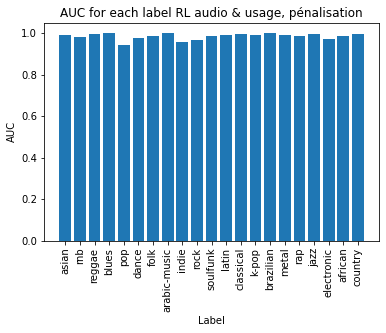

In [37]:
name=os.path.join(project_dir,'docs/LR/ROC_LR_audio_usage_penal/AUC')
graph_auc(auc_labels,'RL audio & usage, pénalisation',save=True,name_fig=name)

##### Étude des variables séléctionnées:

In [38]:
i=0
for i in range (21): 
    n_audio[i]=round((n_audio[i]/n_features[i])*100,2)
    n_usage[i]=round((n_usage[i]/n_features[i])*100,2)

In [39]:
selected_audio_usage=pd.DataFrame(columns=['Nombre de variables sélectionnées sur 384', "Pourcentage de variables audio" , "Pourcentage de variables usage"])

In [40]:
for i in range (21):
    label=l[i]
    selected_audio_usage.loc[label]=[n_features[i],n_audio[i],n_usage[i]]

In [41]:
m=round(mean(n_features),2)
ma=round(mean(n_audio),2)
mu=round(mean(n_usage),2)
selected_audio_usage.loc['Moyenne sur tous les Labels']=[m,ma,mu]

In [42]:
selected_audio_usage.to_csv(os.path.join(project_dir,'docs/LR/selected_audio_usage.csv'))

##### Matrice de confusion

In [43]:
y_true=df_test.values
y_pred=df_hat.values
conf=multilabel_confusion_matrix(y_true,y_pred)
i=0
for cm in conf:
    label=l[i]
    name_fig= os.path.join(project_dir,'docs/LR/CM_LR_audio_usage_penal/'+label)
    plot_confusion_matrix(cm,title=label,classes=[label,'Others'],normalize=True,save=True,name_fig=name_fig)
    i=i+1

<Figure size 432x288 with 0 Axes>

##### Résultats

In [44]:
r=all_metrics(y_true,y_pred)
final_res.loc['RL audio-usage & pénalisation (optimisée)']=r

In [45]:
final_res.to_csv(os.path.join(project_dir,'docs/LR/Results_RL.csv'))

# ROC CURVE même graphique

In [50]:
def roc_same_graph(df,i,label,save=False,name_fig=None):
    plt.clf()
    plt.title(label)
    plt.plot([0, 1], [0, 1],'p--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    X_a,Y_a=extract_values_array(df,p=1,audio=True,usage=False)
    X_u,Y_u=extract_values_array(df,p=1,audio=False,usage=True)
    X,Y=extract_values_array(df,p=1,audio=True,usage=True)
    #audio
    X_train,X_test,Y_train,Y_test = train_test_split(X_a,Y_a[:,i],test_size=0.3, random_state=5)
    filename=os.path.join(project_dir,'docs/LR/joblib_LR_audio_only_penal/'+label)
    logreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
    gs=GridSearchCV(logreg,parameters,cv=3,verbose=3)
    logreg = load_fit(gs,X_train,Y_train,filename) 
    y_hat_a= logreg.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_hat_a)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = 'AUC audio = %0.2f' % roc_auc)
    #usage
    X_train,X_test,Y_train,Y_test = train_test_split(X_u,Y_u[:,i],test_size=0.3, random_state=5)
    filename=os.path.join(project_dir,'docs/LR/joblib_LR_usage_only_penal/'+ label)
    logreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
    gs=GridSearchCV(logreg,parameters,cv=3,verbose=3)
    logreg = load_fit(gs,X_train,Y_train,filename) 
    y_hat_u= logreg.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_hat_u)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'r', label = 'AUC usage = %0.2f' % roc_auc)
    #audiousage
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y[:,i],test_size=0.3, random_state=5)
    filename=os.path.join(project_dir,'docs/LR/joblib_LR_audio_usage_penal/'+label)
    logreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
    gs=GridSearchCV(logreg,parameters,cv=3,verbose=3)
    logreg = load_fit(gs,X_train,Y_train,filename) 
    y_hat= logreg.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_hat)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'g', label = 'AUC audio and usage = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    if not save:
        plt.show()
    else:
        plt.savefig(name_fig)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at yo

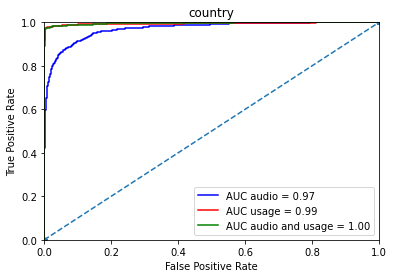

In [51]:
i=0
for label in l:
    filename=os.path.join(project_dir,'docs/LR/ROC/'+label)
    roc_same_graph(df,i,label,save=True,name_fig=filename)
    i=i+1

In [49]:
final_res.to_csv(os.path.join(project_dir,'docs/LR/Results'))